In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [10]:
(X_train, _), (X_test, _) = mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

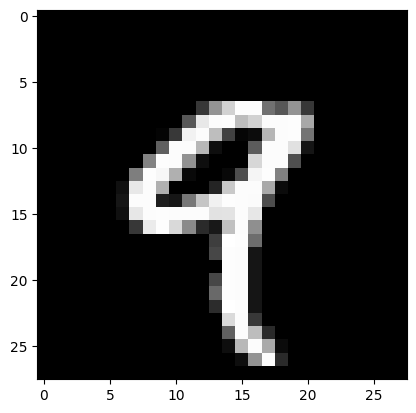

In [12]:
plt.imshow(X_train[4], cmap='gray')
plt.show()

In [13]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [14]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [15]:
X_train_noise = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [16]:
X_train_noise = np.clip(X_train_noise, 0.0, 1.0)
X_test_noise = np.clip(X_test_noise, 0.0, 1.0)

In [17]:
inputs = Input(shape=(784,))
encoder = Dense(32, activation="relu")(inputs)
decoder = Dense(784, activation="sigmoid")(encoder)

autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(X_train_noise,
                X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noise, X_test))

Epoch 1/100
235/235 [==============================] - 7s 7ms/step - loss: 0.2841 - val_loss: 0.2210
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1996 - val_loss: 0.1837
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1761 - val_loss: 0.1654
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1593 - val_loss: 0.1519
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1495 - val_loss: 0.1447
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1433 - val_loss: 0.1394
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1378 - val_loss: 0.1340
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1339 - val_loss: 0.1315
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1318 - val_loss: 0.1298
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1304 - val_lo

In [28]:
idx = np.random.randint(X_test.shape[0])
original_img = X_test[idx]

noise_img = original_img + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_img.shape)
noise_img = np.clip(noise_img, 0.0, 1.0)

denoised_img = autoencoder.predict(np.expand_dims(noise_img, axis=0))

1/1 [==============================] - 0s 25ms/step


(-0.5, 27.5, 27.5, -0.5)

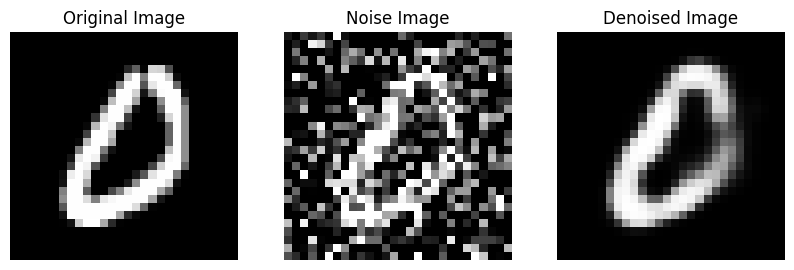

In [29]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_img.reshape(28, 28), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noise_img.reshape(28, 28), cmap="gray")
plt.title("Noise Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(denoised_img.reshape(28, 28), cmap="gray")
plt.title("Denoised Image")
plt.axis("off")